# K-means & PCA 课后作业

### 此次课后练习附带了data1用于练习PCA，data2用于K-means练习，image用于图像压缩练习

## 练习2：K-means 聚类

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio

In [17]:
mat = sio.loadmat('./data/ex7data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

##### 先看一下数据长什么样

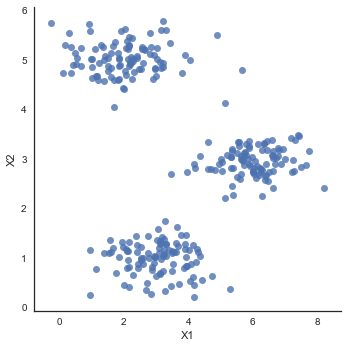

In [18]:
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])

sns.set(context='notebook', style='white')
sns.lmplot('X1', 'X2', data=data, fit_reg=False)
plt.show()

##### 定义相关函数

In [19]:
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

def random_init(data, k):
    ''' choose k sample from data set as init centroids '''
    return data.sample(k).values

def _find_your_cluster(x, centroids):
    ''' find the right cluster for x with respect to shortest distance
        https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.apply_along_axis.html '''
    distances = np.apply_along_axis( func1d = np.linalg.norm,    # 求1范数
                                     axis = 1,
                                     arr = centroids - x         # 用于求每一行样本与x之间的1范数
                                   )
    
    return np.argmin(distances) # 返回距离x最小的值下标

def assign_cluster(data, centroids):
    ''' assign cluster for each node in data
        and then return C ndarray '''
    return np.apply_along_axis( lambda x: _find_your_cluster(x, centroids),
                                axis = 1,
                                arr = data
                              )

def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)
    
    return data_with_c.groupby('C', as_index=False).mean().sort_values(by='C').drop('C', axis=1).values

def cost(data, centroids, C):
    m = data.shape[0]
    
    expand_C_with_centroids = centroids[C]
    
    distances = np.apply_along_axis( func1d = np.linalg.norm,
                                     axis=1,
                                     arr = data.values - expand_C_with_centroids
                                   )
    
    return distances.sum() / m

def _k_means_iter(data, k, epoch=100, tol=0.0001):
    ''' one shot k-means with early break '''
    centroids = random_init(data, k)
    cost_progress = []
    
    for i in range(epoch):
        print('running epoch {}'.format(i))
        
        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))
        
        if len(cost_progress) > 1:
            if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break
    return C, centroids, cost_progress[-1]

def k_means(data, k, epoch=100, n_init=10):
    ''' do multiple random init and pick the best one to return '''
    
    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])
    least_cost_idx = np.argmin(tries[:, -1])
    
    return tries[least_cost_idx]
            

##### 开始 k_means 聚类过程

##### 先看看随机初始化三个聚类中心，然后样本分配给初始的聚类中心的情况

In [20]:
init_centroids = random_init(data, 3)

C = assign_cluster(data, init_centroids)
data_with_C = combine_data_C(data, C)
data_with_C.head()

,X1,X2,C
0,1.842080,4.607572,1
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,1
4,3.231979,4.939894,1


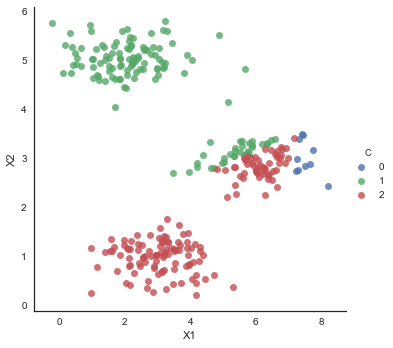

In [21]:
sns.lmplot('X1', 'X2', data=data_with_C, hue='C', fit_reg=False)
plt.show()

##### 然后我们运行 k_means 算法，看看最终的聚类结果

running epoch 0
running epoch 1
running epoch 2
running epoch 3


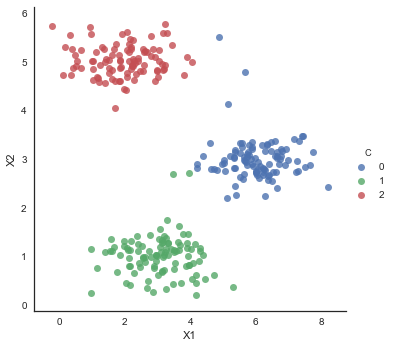

In [22]:
final_C, final_centroid, _ = _k_means_iter(data, 3)
data_with_C = combine_data_C(data, final_C)

sns.lmplot('X1', 'X2', data=data_with_C, hue='C', fit_reg=False)
plt.show()

In [23]:
cost(data, final_centroid, final_C)

0.794176363371587

##### 试试不同的多次随机初始化看看最终的结果

In [25]:
best_C, best_centroids, least_cost = k_means(data, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4


In [26]:
least_cost

0.794176363371587

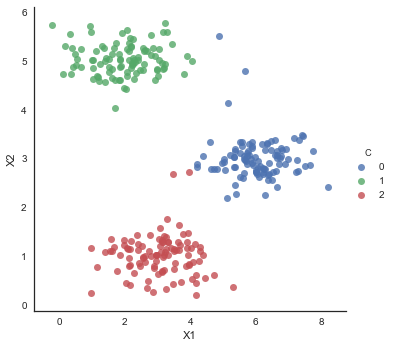

In [27]:
data_with_C = combine_data_C(data, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_C, fit_reg=False)
plt.show()

##### 试试 sk-learn 库中的 k-means 模块

In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

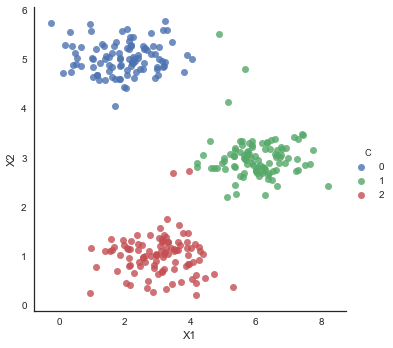

In [29]:
sk_C = model.predict(data)

data_with_C = combine_data_C(data, sk_C)

sns.lmplot('X1', 'X2', hue='C', data=data_with_C, fit_reg=False)
plt.show()

## 练习3：K-Means 用于图像压缩

##### 直接用现成的 sklearn 库中的模块，具体手写算法以后再练习

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##### import image as ndarray

C:\Users\Liam\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Liam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


C:\Users\Liam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\Users\Liam\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


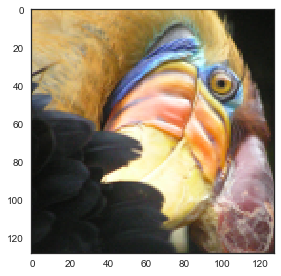

In [36]:
from skimage import io
pic = io.imread('data/bird_small.png') / 255
io.imshow(pic)

In [40]:
pic.shape

(128, 128, 3)

In [41]:
data = pic.reshape(128*128, 3)

In [42]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [45]:
centroids[C].shape

(16384, 3)

In [46]:
compressed_pic = centroids[C].reshape(128, 128, 3)

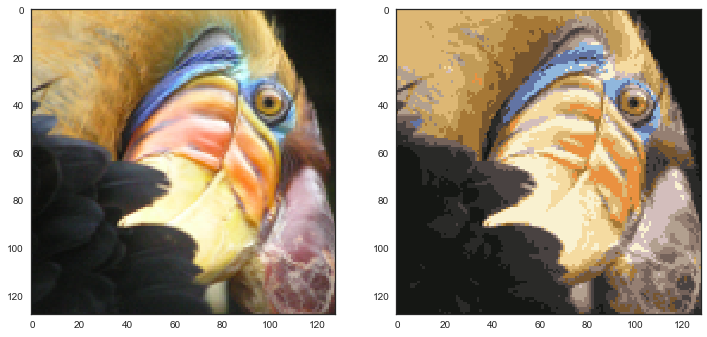

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

## 练习4：PCA用于数据压缩降维

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.io as sio

sns.set(context='notebook', style='white')

#### load data

In [111]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')
X.shape

(50, 2)

##### 先看一下数据长什么样

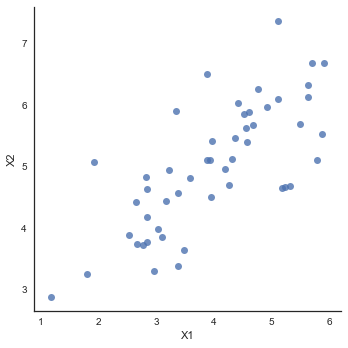

In [112]:
sns.lmplot('X1', 'X2', data=pd.DataFrame(X, columns=['X1', 'X2']), fit_reg=False)
plt.show()

#### 主成分分析法：PCA减少数据从 n 维到 k 维

##### 第一步：数据归一化

In [113]:

''' DataFrame对象用如下函数 '''
'''
def normalize_feature(df):
    return df.apply( lambda column: (column - column.mean()) / column.std())
    '''

''' ndarray对象用如下函数 '''
'''
def normalize_feature(X):
    
    X_copy = X.copy()
    return np.apply_along_axis( func1d = lambda column : (column - column.mean()) / column.std(),
                                axis=1,
                                arr=X_copy,
                                )
'''

def normalize_feature(X):
    """ for each column, X-mean / std """
    X_copy = X.copy()
    m, n = X_copy.shape

    for col in range(n):
        X_copy[:, col] = (X_copy[:, col] - X_copy[:, col].mean()) / X_copy[:, col].std()

    return X_copy

##### 第二步：计算协方差矩阵（即载体矩阵）    $\Sigma = \frac{1}{m}X^{T}X$

In [114]:
def covariance_matrix(X):
    
    m = X.shape[0]
    
    return (X.T @ X) / m

##### 第三步：计算协方差矩阵$\Sigma$的**特征向量**，$u,s,v=svd(\Sigma)$

In [115]:
def pca(Sigma):
    
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S, V

##### 第四步：得出数据在最终压缩空间上的投影，$z=U_{reduce}\times{X}$，其中$U_{reduce}$为$U$的前$k$列，即要压缩到几维。

In [116]:
def project_data(X, U, k):
    
    _, n = X.shape
    if k > n:
        raise ValueError('K shoud be lower dimension of n')
        
    return X @ U[:, :k]

##### 数据复原，$X={Z}\times{U_{reduce}}$，复原不能得到原始数据，只能得到近似的结果

In [117]:
def recover_data(Z, U):
    
    _, k = Z.shape
    if k >= U.shape[0]:
        raise ValueError('You shoud recover from lower dimension to higher')
        
    return Z @ U[:, :k].T

### 接下来，跑一遍我们的过程，看看压缩与复原效果如何。

##### 压缩数据到1维

In [118]:
X_norm = normalize_feature(X)        # 数据归一化
Sigma = covariance_matrix(X_norm)    # 求协方差矩阵
U, S, V = pca(Sigma)                 # 奇异值分解求U, S, V
Z = project_data(X_norm, U, 1)       # 求出最终压缩结果Z

##### 从压缩后的数据复原数据

In [119]:
X_recover = recover_data(Z, U)

##### 我们将三个图画在一起对比，分别为数据压缩前，数据压缩后，复原数据

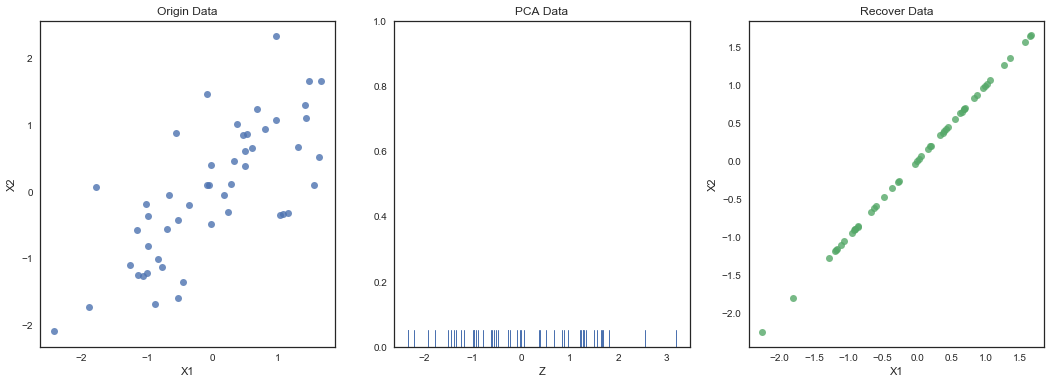

In [120]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 6))

sns.regplot('X1', 'X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']), fit_reg=False, ax=ax[0])
sns.rugplot(Z, ax=ax[1])
sns.regplot('X1', 'X2', data=pd.DataFrame(X_recover, columns=['X1', 'X2']), fit_reg=False, ax=ax[2])

ax[0].set_title('Origin Data')
ax[1].set_xlabel('Z')
ax[1].set_title('PCA Data')
ax[2].set_title('Recover Data')

plt.show()

## 练习5：PCA用于面部数据压缩

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

sns.set(context='notebook', style='white')

In [2]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.get('X')

array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
        -111.86631387,  -99.86631387],
       [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
          -8.86631387,    0.13368613],
       [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
        -111.86631387, -111.86631387],
       ...,
       [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
          80.13368613,   59.13368613],
       [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
         -41.86631387,  -46.86631387],
       [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
          17.13368613,   18.13368613]])

In [7]:
mat.get('X').shape

(5000, 1024)